In [5]:
# Welcome to your new notebook
# Type here in the cell editor to add code!
import json
import pandas as pd
import seaborn as sns
import urllib.request

### The US Department of Agriculture (USDA) makes available a database of food nutrient information. The records look like this:

In [2]:
{
  "id": 21441,
  "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY, Wing, meat and skin with breading",
  "tags": ["KFC"],
  "manufacturer": "Kentucky Fried Chicken",
  "group": "Fast Foods",
  "portions": [
    {
      "amount": 1,
      "unit": "wing, with skin",
      "grams": 68.0
    },

    ...
  ],
  "nutrients": [
    {
      "value": 20.8,
      "units": "g",
      "description": "Protein",
      "group": "Composition"
    },

    ...
  ]
}

{'id': 21441,
 'description': 'KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY, Wing, meat and skin with breading',
 'tags': ['KFC'],
 'manufacturer': 'Kentucky Fried Chicken',
 'group': 'Fast Foods',
 'portions': [{'amount': 1, 'unit': 'wing, with skin', 'grams': 68.0},
  Ellipsis],
 'nutrients': [{'value': 20.8,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  Ellipsis]}

### Each food has a number of identifying attributes along with two lists of nutrients and portion sizes. Data in this form is not particularly amenable to analysis, so we need to do some work to wrangle the data into a better form.

In [7]:
with urllib.request.urlopen('https://raw.githubusercontent.com/thousandoaks/Python4DS-II/main/datasets/database.json') as url:
    db=json.load(url)

In [8]:
type(db)

list

### Each entry in db is a dictionary containing all the data for a single food. The "nutrients" field is a list of dictionaries, one for each nutrient:

In [12]:
db[0]

{'id': 1008,
 'description': 'Cheese, caraway',
 'tags': [],
 'manufacturer': '',
 'group': 'Dairy and Egg Products',
 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}],
 'nutrients': [{'value': 25.18,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  {'value': 29.2,
   'units': 'g',
   'description': 'Total lipid (fat)',
   'group': 'Composition'},
  {'value': 3.06,
   'units': 'g',
   'description': 'Carbohydrate, by difference',
   'group': 'Composition'},
  {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
  {'value': 376.0,
   'units': 'kcal',
   'description': 'Energy',
   'group': 'Energy'},
  {'value': 39.28,
   'units': 'g',
   'description': 'Water',
   'group': 'Composition'},
  {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
  {'value': 0.0,
   'units': 'g',
   'description': 'Fiber, total dietary',
   'group': 'Composition'},
  {'value': 673.0,
   'units': 'mg',
   'description': 'Calcium,

In [13]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [14]:
db[0]['description']

'Cheese, caraway'

In [15]:
db[0]['group']

'Dairy and Egg Products'

In [16]:
db[0]['tags']

[]

In [17]:
db[0]["nutrients"]

[{'value': 25.18,
  'units': 'g',
  'description': 'Protein',
  'group': 'Composition'},
 {'value': 29.2,
  'units': 'g',
  'description': 'Total lipid (fat)',
  'group': 'Composition'},
 {'value': 3.06,
  'units': 'g',
  'description': 'Carbohydrate, by difference',
  'group': 'Composition'},
 {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
 {'value': 376.0, 'units': 'kcal', 'description': 'Energy', 'group': 'Energy'},
 {'value': 39.28,
  'units': 'g',
  'description': 'Water',
  'group': 'Composition'},
 {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
 {'value': 0.0,
  'units': 'g',
  'description': 'Fiber, total dietary',
  'group': 'Composition'},
 {'value': 673.0,
  'units': 'mg',
  'description': 'Calcium, Ca',
  'group': 'Elements'},
 {'value': 0.64,
  'units': 'mg',
  'description': 'Iron, Fe',
  'group': 'Elements'},
 {'value': 22.0,
  'units': 'mg',
  'description': 'Magnesium, Mg',
  'group': 'Elements'},
 {'value': 490.0,

In [18]:
FirstItemNutrients = pd.DataFrame(db[0]["nutrients"])

In [19]:
FirstItemNutrients

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


In [20]:
SecondItemNutrients = pd.DataFrame(db[1]["nutrients"])
SecondItemNutrients

,value,units,description,group
0,24.900,g,Protein,Composition
1,33.140,g,Total lipid (fat),Composition
2,1.280,g,"Carbohydrate, by difference",Composition
3,3.930,g,Ash,Other
4,403.000,kcal,Energy,Energy
...,...,...,...,...
232,0.000,mcg,"Vitamin B-12, added",Vitamins
233,105.000,mg,Cholesterol,Other
234,21.092,g,"Fatty acids, total saturated",Other
235,9.391,g,"Fatty acids, total monounsaturated",Other


### When converting a list of dictionaries to a DataFrame, we can specify a list of fields to extract. We’ll take the food names, group, ID, and manufacturer:

In [21]:
info_keys = ["description", "group", "id", "manufacturer"]

FoodInfo = pd.DataFrame(db, columns=info_keys)

FoodInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [22]:
FoodInfo.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


### You can explore the distribution of food groups

In [23]:
FoodInfo.groupby('group').count()

,description,id,manufacturer
group,,,
Baby Foods,209,209,48
Baked Products,496,496,329
Beef Products,618,618,487
Beverages,278,278,205
Breakfast Cereals,403,403,335
Cereal Grains and Pasta,183,183,180
Dairy and Egg Products,107,107,51
Ethnic Foods,165,165,0
Fast Foods,365,365,327


In [24]:
pd.value_counts(FoodInfo["group"])

group
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and

<ipython-input-25-e795587f1222>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90);


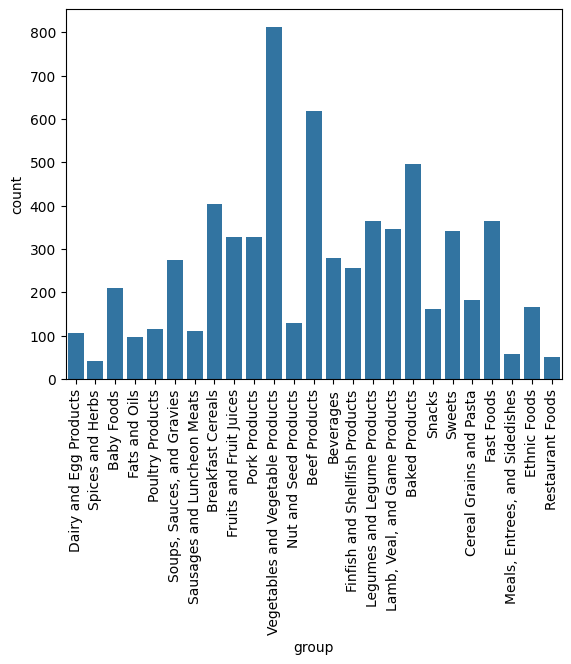

In [25]:
plot=sns.countplot(FoodInfo, x="group");
plot.set_xticklabels(plot.get_xticklabels(), rotation=90);

### Now, to do some analysis on all of the nutrient data, it’s easiest to assemble the nutrients for each food into a single large table. To do so, we need to take several steps. First, I’ll convert each list of food nutrients to a DataFrame, add a column for the food id, and append the DataFrame to a list. Then, these can be concatenated with concat. Run the following code in a Jupyter cell:

In [26]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [27]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [28]:
nutrients.duplicated().sum()  # number of duplicates



14179

In [29]:
nutrients = nutrients.drop_duplicates()

In [30]:
nutrients.head()

,value,units,description,group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


In [31]:
FoodInfo.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


#### Since "group" and "description" are in both DataFrame objects, we can rename for clarity:

In [32]:
col_mapping = {"description" : "food","group" : "fgroup"}

FoodInfo = FoodInfo.rename(columns=col_mapping, copy=False)

FoodInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [33]:
col_mapping = {"description" : "nutrient","group" : "nutgroup"}

nutrients = nutrients.rename(columns=col_mapping, copy=False)

nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   value     375176 non-null  float64
 1   units     375176 non-null  object 
 2   nutrient  375176 non-null  object 
 3   nutgroup  375176 non-null  object 
 4   id        375176 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 17.2+ MB


### With all of this done, we’re ready to merge info with nutrients:

In [34]:
ndata = pd.merge(nutrients, FoodInfo, on="id")

In [35]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.9+ MB


In [ ]:
ndata.head()

StatementMeta(, c82bb9be-2634-4560-bbc0-1b39604aa900, 30, Finished, Available)

,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
0,25.18,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.20,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.06,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.28,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.00,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,


### We could now make a plot of median values by food group and nutrient type (see Median zinc values by food group):

<Axes: ylabel='fgroup'>

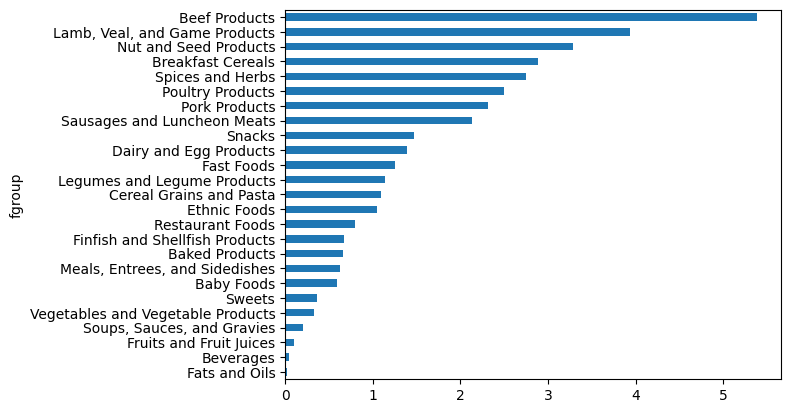

In [36]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)

result["Zinc, Zn"].sort_values().plot(kind="barh")

In [ ]:
ndata.head(100)

StatementMeta(, c82bb9be-2634-4560-bbc0-1b39604aa900, 32, Finished, Available)

,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
0,25.180,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.200,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.060,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.280,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.000,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
...,...,...,...,...,...,...,...,...
95,0.027,mg,Thiamin,Vitamins,1009,"Cheese, cheddar",Dairy and Egg Products,
96,0.375,mg,Riboflavin,Vitamins,1009,"Cheese, cheddar",Dairy and Egg Products,
97,0.080,mg,Niacin,Vitamins,1009,"Cheese, cheddar",Dairy and Egg Products,
98,0.413,mg,Pantothenic acid,Vitamins,1009,"Cheese, cheddar",Dairy and Egg Products,


## Pandas `json_normalize()` offers a convenient approach to flatten JSONS

In [37]:
pd.json_normalize(db[0:3])

,id,description,tags,manufacturer,group,portions,nutrients
0,1008,"Cheese, caraway",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 25.18, 'units': 'g', 'description':..."
1,1009,"Cheese, cheddar",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup, diced', 'grams': ...","[{'value': 24.9, 'units': 'g', 'description': ..."
2,1018,"Cheese, edam",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 4.22, 'units': 'g', 'description': ..."


In [38]:
pd.json_normalize(data=db[0:3], record_path=['nutrients'], meta=['id'])

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
607,0.000,mcg,"Vitamin B-12, added",Vitamins,1018
608,89.000,mg,Cholesterol,Other,1018
609,17.572,g,"Fatty acids, total saturated",Other,1018
610,8.125,g,"Fatty acids, total monounsaturated",Other,1018


In [39]:
pd.json_normalize(data=db[0:3], record_path=['portions'], meta=['id'])

,amount,unit,grams,id
0,1,oz,28.35,1008
1,1,"cup, diced",132.00,1009
2,2,"cup, melted",244.00,1009
3,3,"cup, shredded",113.00,1009
4,4,oz,28.35,1009
5,5,cubic inch,17.00,1009
6,6,slice (1 oz),28.00,1009
7,1,oz,28.35,1018
8,2,package (7 oz),198.00,1018
